# CAT-DOG-MONKEY


In [127]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import pydot
import warnings 
warnings.filterwarnings('ignore') 
from tensorflow.keras.utils import plot_model
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 

import os 
import matplotlib.image as mpimg


In [129]:
from zipfile import ZipFile
data_path='dog-cat-monkey.zip'
with ZipFile (data_path,'r') as zip:
    zip.extractall()
    print("The data set has been extracted.")

The data set has been extracted.


In [130]:
path='dog-cat-monkey'
classes=os.listdir(path)
classes

['cats', 'dogs', 'monkeys']

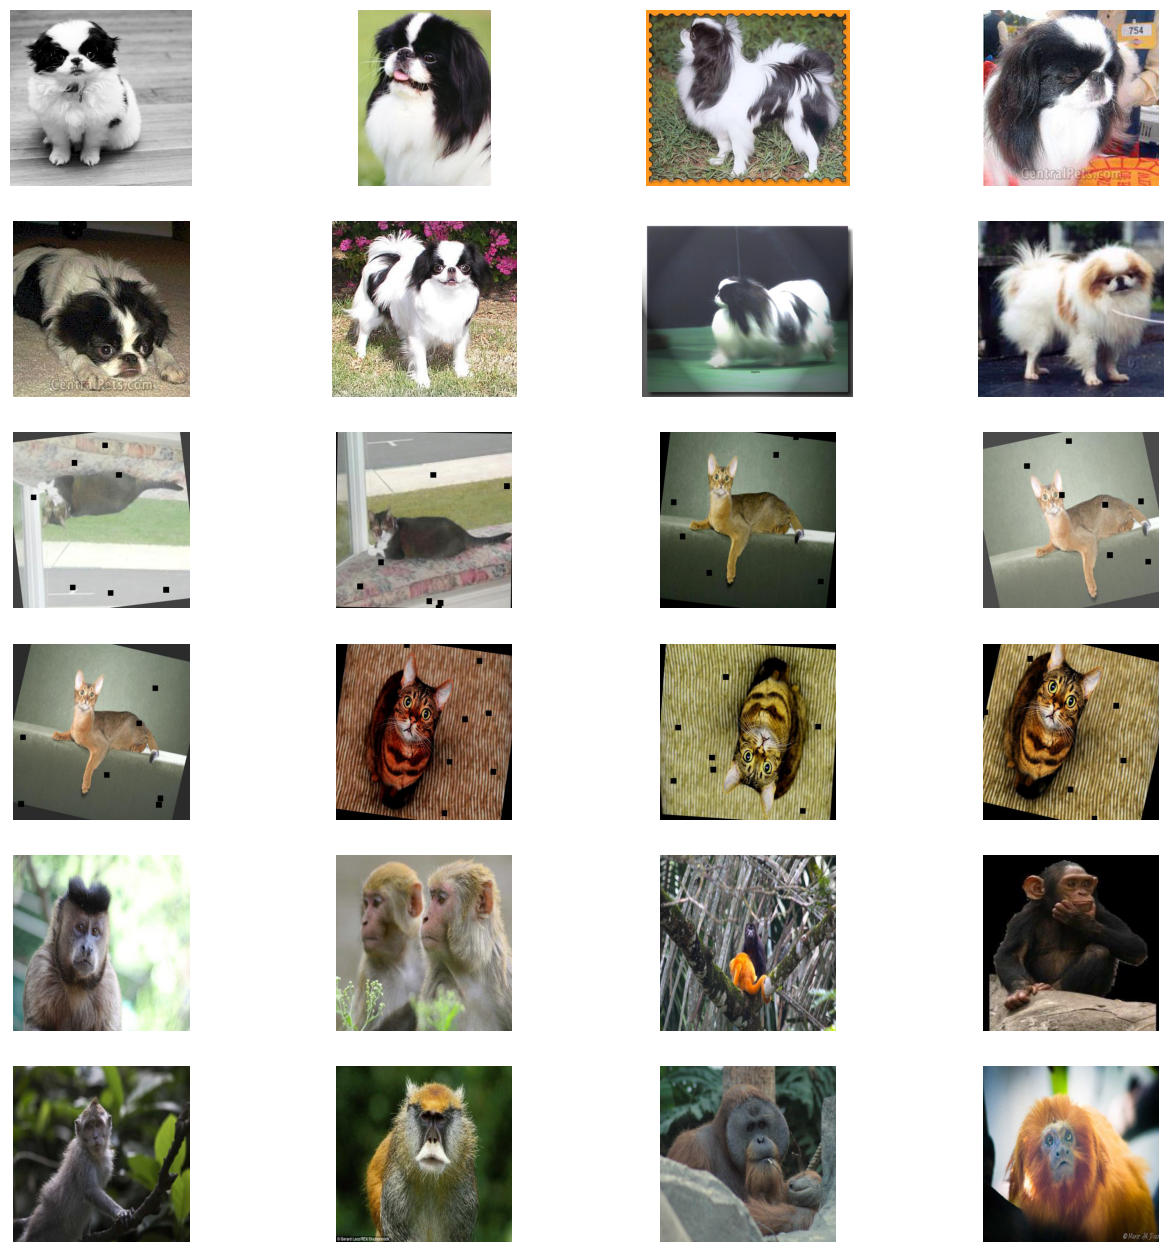

In [131]:
fig=plt.gcf()
fig.set_size_inches(16,16)

dog_dir= os.path.join('dog-cat-monkey/dogs')
cat_dir=os.path.join('dog-cat-monkey/cats')
monkey_dir=os.path.join('dog-cat-monkey/monkeys')

dog_names=os.listdir(dog_dir)
cat_names=os.listdir(cat_dir)
monkey_names=os.listdir(monkey_dir)

pic_index=210
dog_images=[os.path.join(dog_dir,fname)
            for fname in dog_names[pic_index-8:pic_index]]
cat_images=[os.path.join(cat_dir,fname)
            for fname in cat_names[pic_index-8:pic_index]]
monkey_images=[os.path.join(monkey_dir,fname)
              for fname in monkey_names[pic_index-8:pic_index]]

for i,img_path in enumerate(dog_images + cat_images + monkey_images):
    sp = plt.subplot(6, 4, i+1)
    sp.axis('Off')
    img=mpimg.imread(img_path)
    plt.imshow(img)

plt.show()



In [145]:
base_dir = 'dog-cat-monkey'

# Create datasets 
# Create datasets with one-hot encoded labels
train_datagen = image_dataset_from_directory(
    base_dir, 
    image_size=(200,200), 
    subset='training', 
    seed=1, 
    validation_split=0.1, 
    batch_size=32, 
    label_mode='categorical'  # This ensures labels are one-hot encoded
) 
                                             
test_datagen = image_dataset_from_directory(
    base_dir, 
    image_size=(200,200), 
    subset='validation', 
    seed=1, 
    validation_split=0.1, 
    batch_size=32, 
    label_mode='categorical'  # Ensure one-hot encoding for validation data
)


Found 4021 files belonging to 3 classes.
Using 3619 files for training.
Found 4021 files belonging to 3 classes.
Using 402 files for validation.


In [147]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 

	layers.Flatten(), 
	layers.Dense(512, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.1), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.2), 
	layers.BatchNormalization(), 
	layers.Dense(3, activation='softmax')  # Change to 3 units for 3 classes
]) 

In [149]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,903,555 (14.89 MB)

 Trainable params: 3,900,483 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

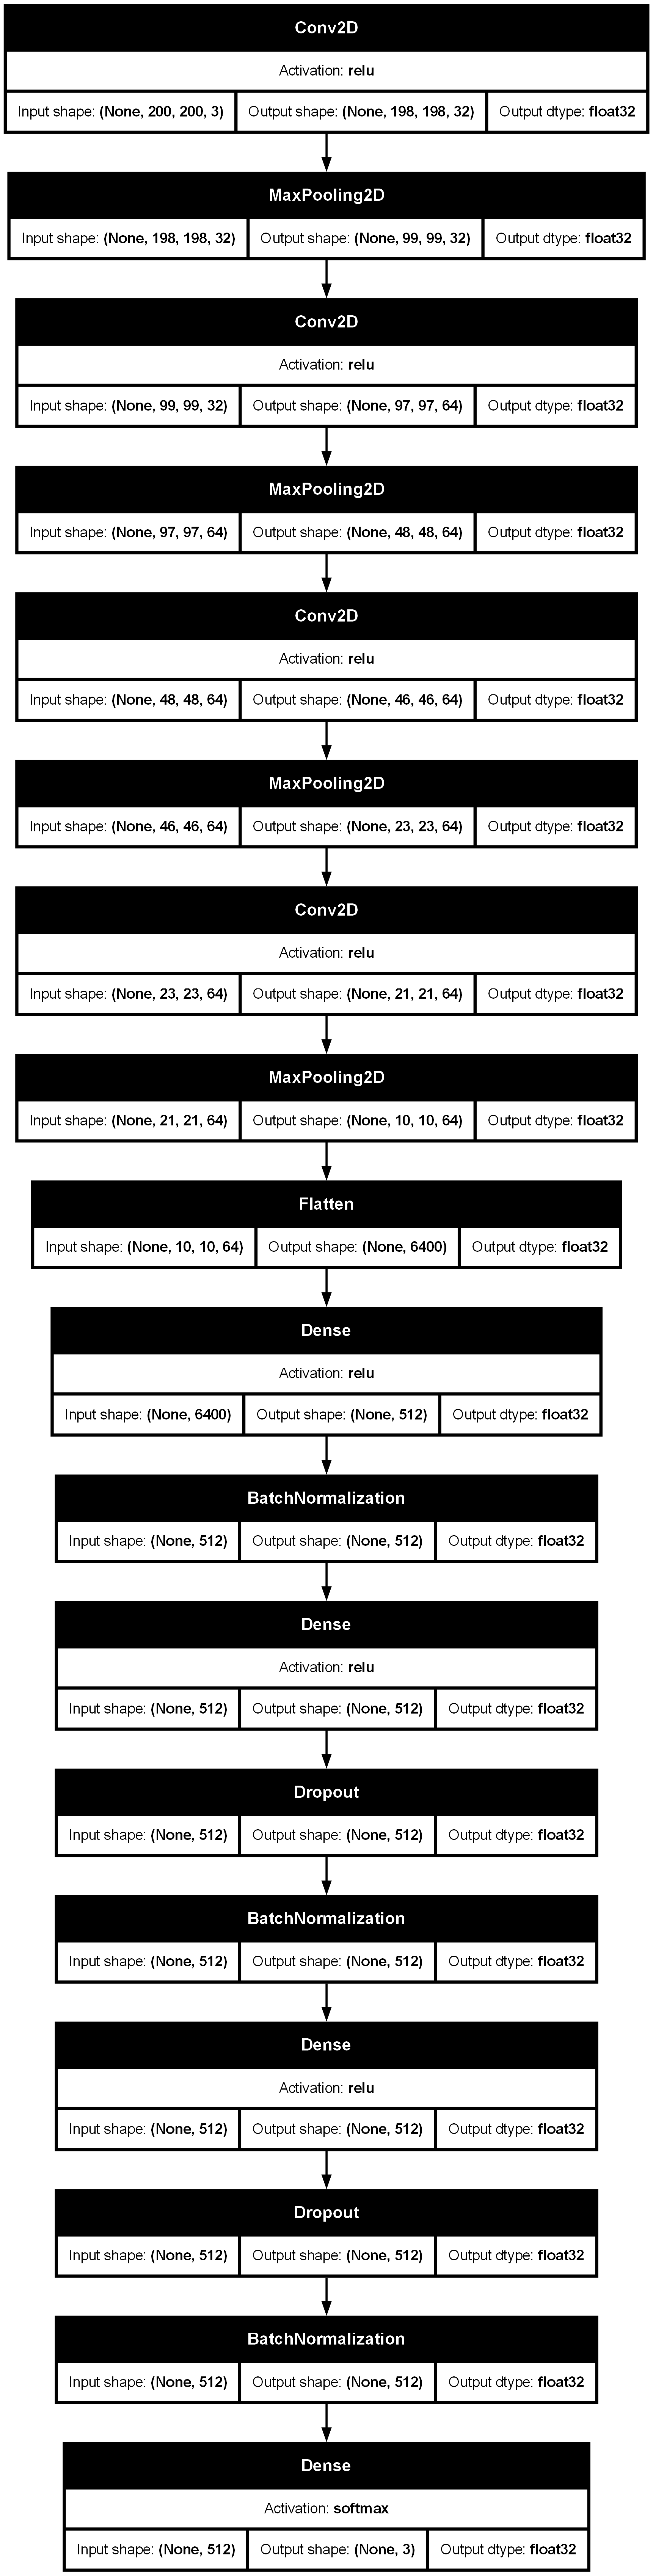

In [139]:
keras.utils.plot_model( 
	model, 
	show_shapes=True, 
	show_dtype=True, 
	show_layer_activations=True
) 

In [151]:
model.compile( 
	loss='categorical_crossentropy',  # Categorical crossentropy is correct
	optimizer='adam', 
	metrics=['accuracy'] 
) 

In [153]:
history = model.fit(train_datagen, 
		epochs=10, 
		validation_data=test_datagen) 


Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 337ms/step - accuracy: 0.4683 - loss: 1.3203 - val_accuracy: 0.4552 - val_loss: 1.6759
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 38s 332ms/step - accuracy: 0.6066 - loss: 0.9561 - val_accuracy: 0.5348 - val_loss: 2.1624
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.7167 - loss: 0.6815 - val_accuracy: 0.3483 - val_loss: 3.5464
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 39s 338ms/step - accuracy: 0.7869 - loss: 0.5139 - val_accuracy: 0.6269 - val_loss: 1.8700
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 38s 333ms/step - accuracy: 0.8415 - loss: 0.3637 - val_accuracy: 0.7139 - val_loss: 0.8317
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 38s 335ms/step - accuracy: 0.8481 - loss: 0.3547 - val_accuracy: 0.7164 - val_loss: 0.9212
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 38s 331ms/step - accuracy: 0.8870 - loss: 0.2760 - val_accuracy: 0.6642 - val_loss: 6.1188
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 38s 333ms/step - accuracy: 0.8436 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Dog


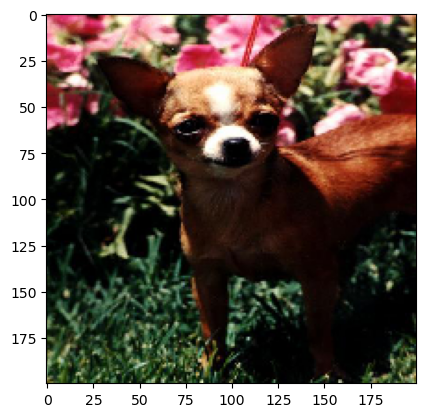

In [165]:
from keras.preprocessing import image 

#Input image 
test_image = image.load_img('dog-cat-monkey/dogs/n02085620_10131.jpg',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 

# Mapping result array with the class indices
predicted_class = np.argmax(result)

if predicted_class == 0: 
    print("Cat") 
elif predicted_class == 1: 
    print("Dog") 
elif predicted_class == 2:
    print("Monkey")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Monkey


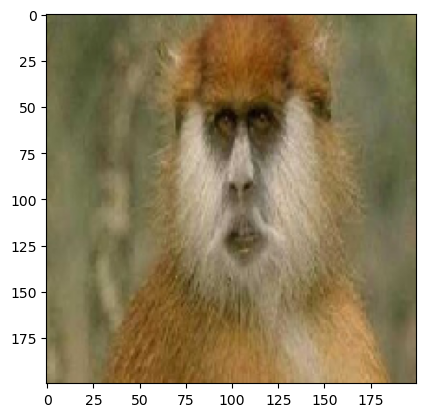

In [169]:
from keras.preprocessing import image 

#Input image 
test_image = image.load_img('dog-cat-monkey/monkeys/26QLP3DAGKB3.jpg',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 

# Mapping result array with the main name list 
if np.argmax(result) == 0: 
    print("Cat") 
elif np.argmax(result) == 1: 
    print("Dog") 
elif np.argmax(result) == 2:
    print("Monkey")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Cat


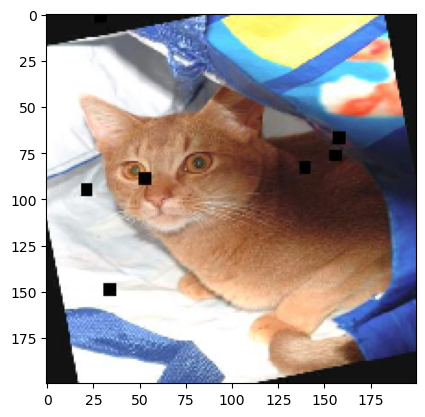

In [115]:
from keras.preprocessing import image 

#Input image 
test_image = image.load_img('dog-cat-monkey/cats/Abyssinian_100_jpg.rf.24534cc50c954d03b4c67bffd3281d3a.jpg',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 

# Mapping result array with the main name list 
if np.argmax(result) == 0: 
    print("Cat") 
elif np.argmax(result) == 1: 
    print("Dog") 
elif np.argmax(result) == 2:
    print("Monkey")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Dog


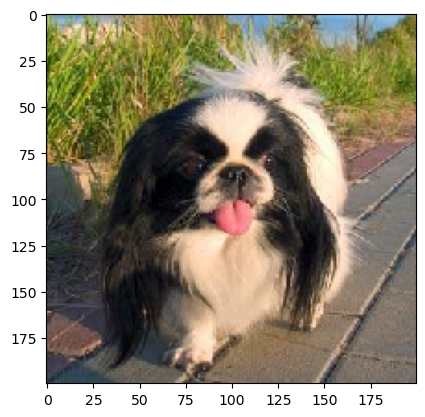

In [159]:
from keras.preprocessing import image 

#Input image 
test_image = image.load_img('dog-cat-monkey/dogs/n02085782_564.jpg',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 

# Mapping result array with the main name list 
if np.argmax(result) == 0: 
    print("Cat") 
elif np.argmax(result) == 1: 
    print("Dog") 
elif np.argmax(result) == 2:
    print("Monkey")